In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [18]:
df = pd.read_pickle('../files/processed_data/capacity_pred.pkl')
df['n'] = df['alken'].str.extract(r'(\d+)').astype(int)
outer_capacity = joblib.load('../files/processed_data/capacity_distrB.pkl')
# df['capacity'] = df['alken'].map(outer_capacity)
df.head()

,p,temperature,adsorption_type,mol_uc_avg,component_num,alken,capacity,n
0,100000,300,absolute,1.554528,0.0,C2,1.554528,2
1,100000,300,excess,1.458681,0.0,C2_out,0.095847,2
2,100000,300,absolute,20.906120,1.0,C4,20.906120,4
3,100000,300,excess,20.810274,1.0,C4_out,0.095846,4
4,100000,300,absolute,9.203780,2.0,C6,9.203780,6


Text(0, 0.5, 'Capacity (mol/uc)')

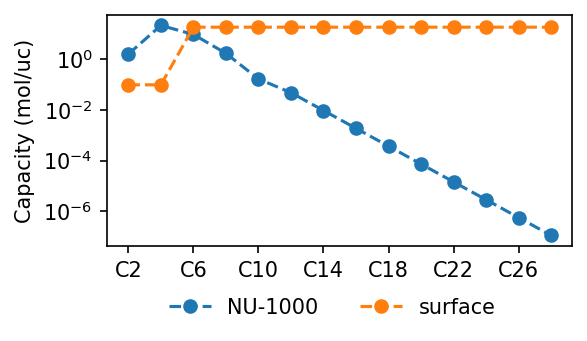

In [19]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=150)
df_in = df[~df.alken.str.contains('out')]
df_out = df[df.alken.str.contains('out')]
ax.plot(df_in['n'], df_in['capacity'], '--o', label='NU-1000')
ax.plot(df_out['n'], df_out['capacity'], '--o', label='surface')
fig.legend(bbox_to_anchor=(0.5, 0.), loc='upper center', ncol=2, frameon=False)
ax.set_xticks(range(2, 29, 4))
ax.set_xticklabels([f'C{n}' for n in range(2, 29, 4)])
ax.set_yscale('log')
ax.set_ylabel('Capacity (mol/uc)')